In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
images = list(uploaded.keys())

Saving man.png to man (11).png
Saving woman.png to woman (8).png


In [3]:
im = cv2.imread(images[0])
im2 = cv2.imread(images[1])

def update_image(im, radius):

    image_a = cv2.GaussianBlur(im, ksize=(31, 31), sigmaX=0, sigmaY=0)
    image_b = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    image_b = cv2.cvtColor(image_b, cv2.COLOR_GRAY2BGR)  # чтобы было 3 канала

    result = image_a.copy()
    mask = np.zeros(shape=result.shape[:2], dtype=np.uint8)
    cv2.circle(mask, (result.shape[1] // 2, result.shape[0] // 2), radius, 1, -1)
    cv2.copyTo(image_b, mask, result)

    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



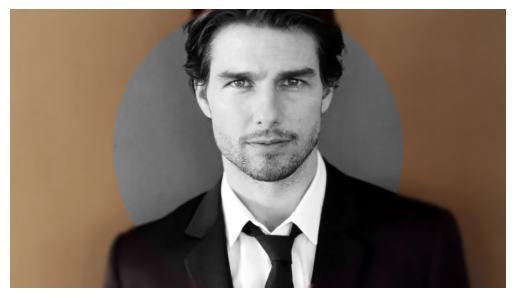

In [4]:
update_image(im, 400)



Сравнить фильтрацию по Гауссу, билатеральную и медианную фильтрацию
(реализовать программу, выводящую результат применения разных фильтров
одновременно, сравнить их для разных значений параметров)

a. Используя какой-либо из фильтров выполнить многоуровневую фильтрацию
(усилить детали изображения с размерами порядка 5-10 пикселей, оставив
неизменными более мелкие детали)

P.S. Вообще не понял какая задача в a пункте... Сделал как дошло...


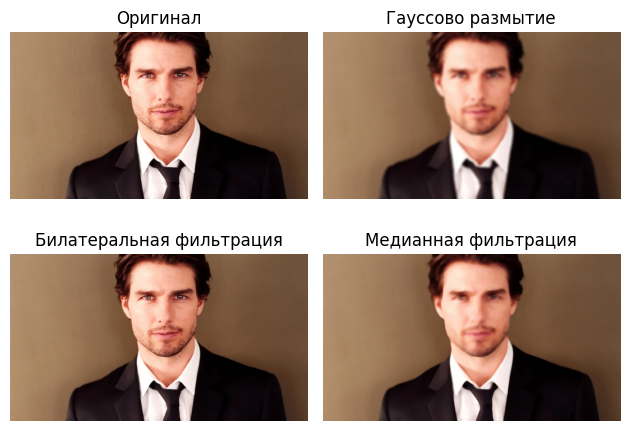

In [5]:
# Функция для построения графиков
def builder(im, index, text):
    plt.subplot(2, 2, index)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(text)
    plt.axis('off')

def compare_filters(im):
    image_gaussian = cv2.GaussianBlur(im, (15, 15), sigmaX=15)
    image_bilateral = cv2.bilateralFilter(im, d=15, sigmaColor=15, sigmaSpace=15)
    image_median = cv2.medianBlur(im, 15)

    builder(im, 1, 'Оригинал')
    builder(image_gaussian, 2, 'Гауссово размытие')
    builder(image_bilateral, 3, 'Билатеральная фильтрация')
    builder(image_median, 4, 'Медианная фильтрация')

    plt.tight_layout()
    plt.show()

compare_filters(im)

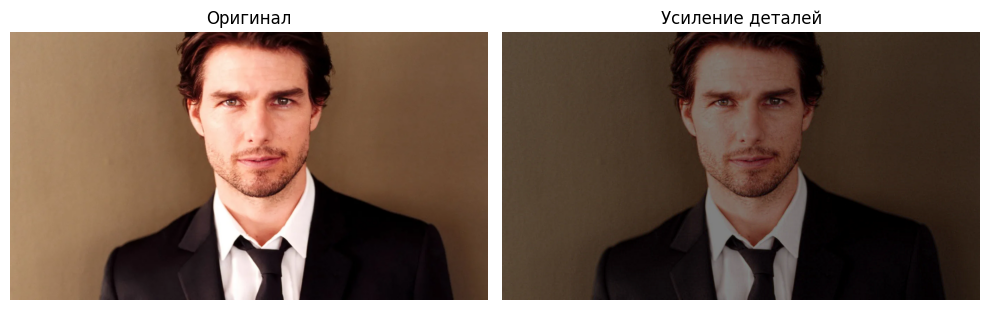

In [6]:
def multi_level_filter(im):
    image_bilateral = cv2.bilateralFilter(im, d=15, sigmaColor=15, sigmaSpace=15)

    # @ param 2 - Умножаем оригинал на 1.5 - делаем его ярче.
    # @ param 4 - Затем вычитаем размытое изображение из оригинала, так как -1.0.
    # @ param 5 - константа, добавляемая к результату. Оставляем как 0, чтобы было красиво. Она влияет также на общую яркость.
    detail_enhanced = cv2.addWeighted(im, 1.5, image_bilateral, -1.0, 0)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title('Оригинал')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(detail_enhanced, cv2.COLOR_BGR2RGB))
    plt.title('Усиление деталей')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Укажите путь к изображению
multi_level_filter(im)

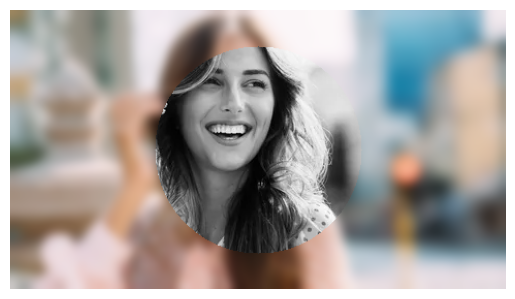

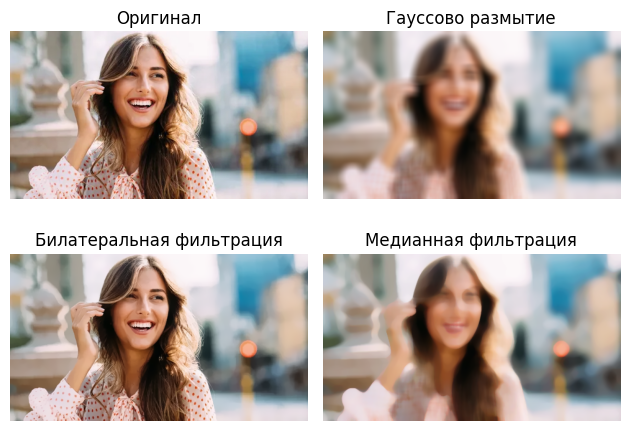

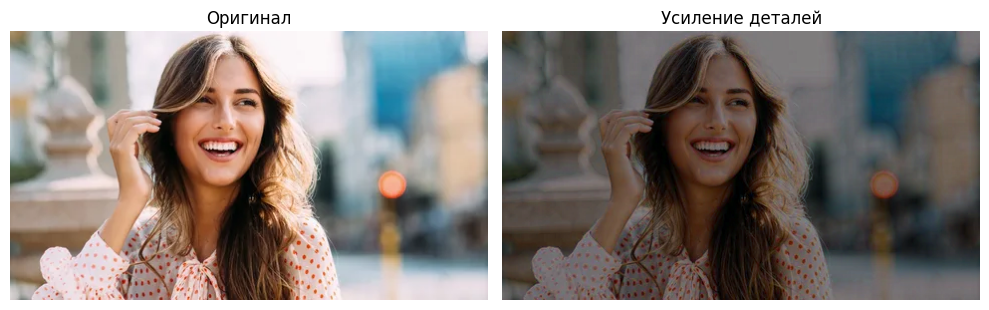

In [8]:
update_image(im2, 100)
print('')
compare_filters(im2)
print('')
multi_level_filter(im2)
